In [2]:
import os
import re
import time
import numpy as np
from scipy import io
from tqdm import tqdm
from scipy import signal
import matplotlib.pyplot as plt
import librosa
%matplotlib inline

In [4]:
INPUT_DIRS = [
    '/datasets/kaggle/mls/train_1',
    '/datasets/kaggle/mls/train_2',
    '/datasets/kaggle/mls/train_3',
    '/datasets/kaggle/mls/test_1',
    '/datasets/kaggle/mls/test_2',
    '/datasets/kaggle/mls/test_3'
]

OUTPUT_DIRS = {
    'waveforms': 'out/waveforms',
    'cache': 'out/'
}

N_SAMPLES = 240000
SAMPLING_RATE = 400
N_CHANNELS = 16

In [5]:
# make sure output dirs exist
for v in OUTPUT_DIRS.values(): 
    if not os.path.isdir(v): 
        os.makedirs(v)

In [6]:
# list files in directories
def list_files(src_dirs):

    if not list == type(src_dirs): src_dirs = [src_dirs]
    
    f = []
    
    for d in src_dirs:
        df = []
        for (dirpath, dirnames, filenames) in os.walk(d):
            filenames = [dirpath + '/' + x for x in filenames]
            df.extend(filenames)
        f.extend(df)
    
    return f

In [7]:
def read_mat(f):
    mat = io.loadmat(f)
    
    sampling_rate = int(mat['dataStruct'][0, 0][1][0, 0])
    n_samples = int(mat['dataStruct'][0, 0][2][0, 0])
    ch_indexes = np.int8(mat['dataStruct'][0, 0][3][0])
    
    # make sure all files have the same format
    assert(sampling_rate == SAMPLING_RATE)
    assert(n_samples == N_SAMPLES)
    assert(len(ch_indexes) == N_CHANNELS)
    
    data = mat['dataStruct'][0, 0][0].T
    
    waves = np.zeros([len(ch_indexes), n_samples], dtype=np.float32)
    
    for i in range(len(ch_indexes)):
        waves[i] = data[ch_indexes[i] - 1]  
        
    return waves

In [141]:
# process waveforms
for f in list_files(INPUT_DIRS):
    fid = re.findall(r'([\d_]+)\.mat$', f)[0]
    waves = read_mat(f)
    print f, fid
    if np.random.rand() > 0.95:
        break

/datasets/kaggle/mls/train_1/1_167_0.mat 1_167_0
/datasets/kaggle/mls/train_1/1_869_0.mat 1_869_0
/datasets/kaggle/mls/train_1/1_507_0.mat 1_507_0
/datasets/kaggle/mls/train_1/1_146_1.mat 1_146_1
/datasets/kaggle/mls/train_1/1_296_0.mat 1_296_0
/datasets/kaggle/mls/train_1/1_295_0.mat 1_295_0
/datasets/kaggle/mls/train_1/1_1098_0.mat 1_1098_0
/datasets/kaggle/mls/train_1/1_1119_0.mat 1_1119_0
/datasets/kaggle/mls/train_1/1_866_0.mat 1_866_0
/datasets/kaggle/mls/train_1/1_949_0.mat 1_949_0
/datasets/kaggle/mls/train_1/1_601_0.mat 1_601_0
/datasets/kaggle/mls/train_1/1_434_0.mat 1_434_0
/datasets/kaggle/mls/train_1/1_922_0.mat 1_922_0
/datasets/kaggle/mls/train_1/1_937_0.mat 1_937_0
/datasets/kaggle/mls/train_1/1_333_0.mat 1_333_0
/datasets/kaggle/mls/train_1/1_301_0.mat 1_301_0
/datasets/kaggle/mls/train_1/1_714_0.mat 1_714_0
/datasets/kaggle/mls/train_1/1_529_0.mat 1_529_0
/datasets/kaggle/mls/train_1/1_958_0.mat 1_958_0
/datasets/kaggle/mls/train_1/1_620_0.mat 1_620_0
/datasets/kaggle

In [142]:
waves = read_mat('/datasets/kaggle/mls/train_1/1_101_1.mat')

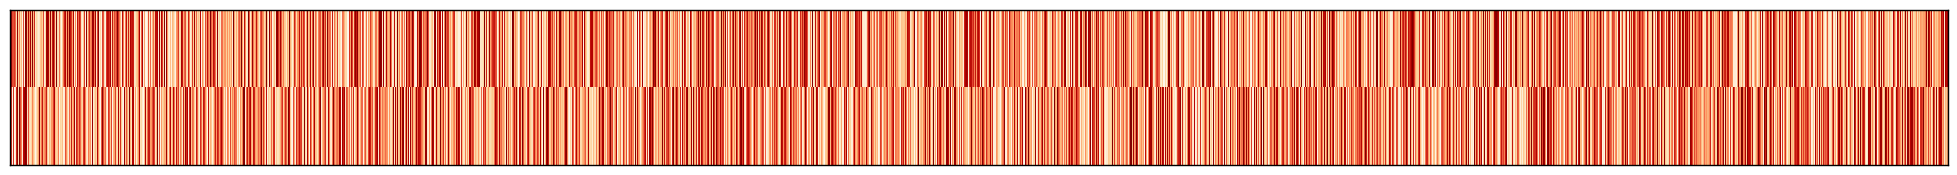

In [53]:
ww = np.random.random([2,240000]).astype(np.float32)
plt.figure(figsize=(25, 2))
librosa.display.specshow(ww, sr=400, hop_length=1024)

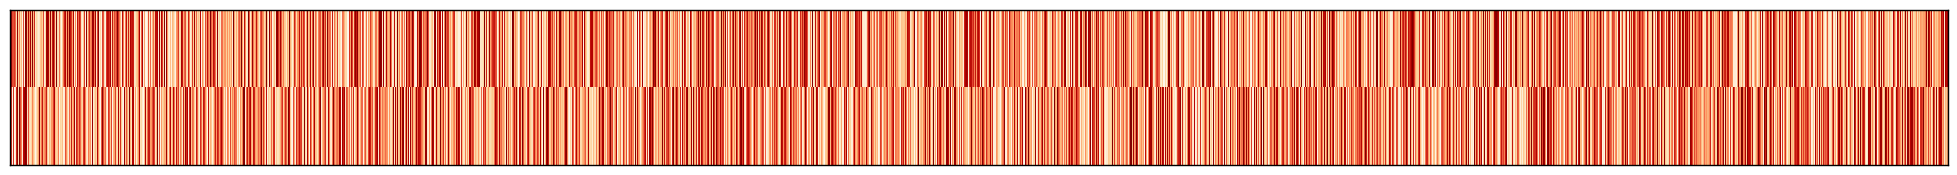

In [56]:
plt.figure(figsize=(25, 2))
librosa.display.specshow(ww, sr=4000, hop_length=2048)

In [58]:
d, s = librosa.load(librosa.util.example_audio_file())

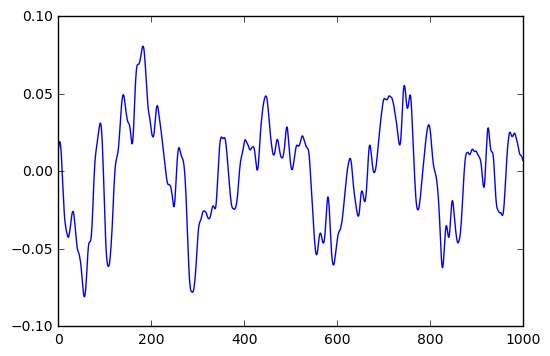

In [62]:
plt.plot(d[100000:101000])

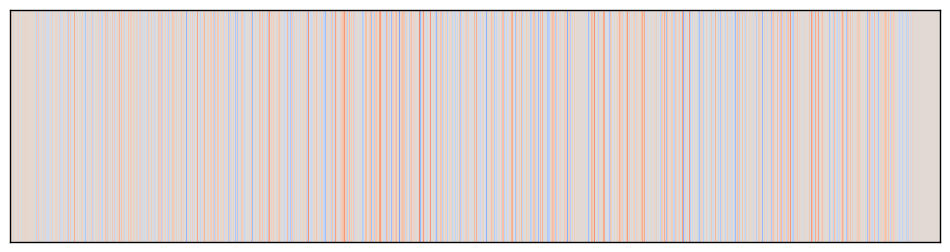

In [77]:
plt.figure(figsize=(12, 3))
librosa.display.specshow(d.reshape(1,-1), s, hop_length=512)

In [143]:
msg = librosa.feature.melspectrogram(y=waves[0], sr=400, hop_length=80, n_fft=16, n_mels=96)

In [144]:
msg.shape

(96, 3001)

(96, 1876)


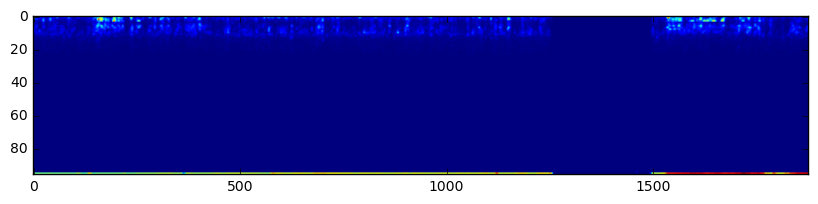

In [146]:
msg = librosa.feature.melspectrogram(y=waves[0], sr=400, hop_length=128, n_fft=2048, n_mels=96)
print msg.shape
plt.figure(figsize=(10, 3))
plt.imshow(msg, aspect=4)

(96, 1876)


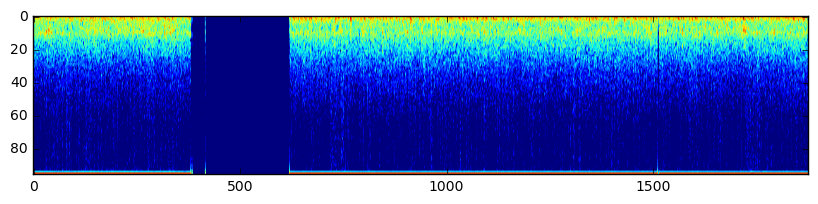

In [165]:
msg = librosa.feature.melspectrogram(y=waves[1], sr=400, hop_length=128, n_fft=512, n_mels=96)
msg = librosa.logamplitude(msg ** 2, ref_power=1.)
msg = np.fliplr(msg)
print msg.shape
plt.figure(figsize=(10, 3))
plt.imshow(msg, aspect=4)

(96, 1876)


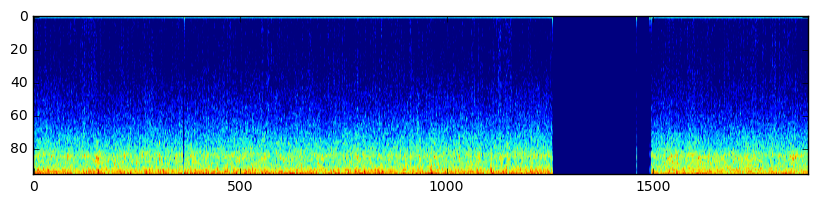

In [167]:
msg = librosa.feature.melspectrogram(y=waves[1], sr=400, hop_length=128, n_fft=512, n_mels=96)
msg = librosa.logamplitude(msg ** 2, ref_power=1.)
msg = np.flipud(msg)
print msg.shape
plt.figure(figsize=(10, 3))
plt.imshow(msg, aspect=4)